In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from functions.week3.public_tests_a1 import * 
from functions.week3.assigment_utils import *
from sklearn import linear_model
tf.keras.backend.set_floatx('float64')

In [3]:
# PolynomialFeatures(degree, include_bias=False)
# StandardScaler()

In [4]:
def my_feature(x):
    return np.c_[x,x**2]

In [5]:
def err(y,y_hat):
    return (1/(2*y.shape[0])) * np.sum((y-y_hat)**2)

In [6]:
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
X = my_feature(X)
X,y,x_ideal.shape,y_ideal.shape

(array([[   0.  ,    0.  ],
        [   2.88,    8.31],
        [   5.76,   33.23],
        [   8.65,   74.77],
        [  11.53,  132.93],
        [  14.41,  207.7 ],
        [  17.29,  299.09],
        [  20.18,  407.09],
        [  23.06,  531.71],
        [  25.94,  672.94],
        [  28.82,  830.8 ],
        [  31.71, 1005.26],
        [  34.59, 1196.35],
        [  37.47, 1404.04],
        [  40.35, 1628.36],
        [  43.24, 1869.29],
        [  46.12, 2126.84],
        [  49.  , 2401.  ]]),
 array([   0.  ,    5.55,   34.39,   71.39,  125.52,  183.03,  237.25,
         441.08,  457.14,  563.11,  901.24, 1025.77,  890.33, 1417.39,
        1268.67, 2242.65, 2653.83, 2391.31]),
 (18,),
 (18,))

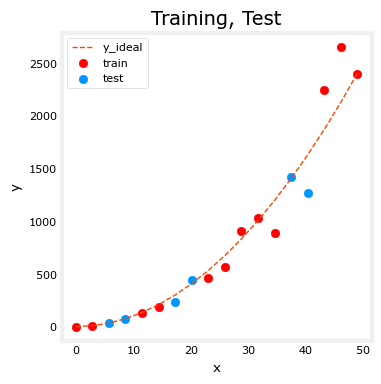

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train[:,0], y_train, color = "red",           label="train")
ax.scatter(X_test[:,0], y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [8]:
X_test

array([[  17.29,  299.09],
       [   8.65,   74.77],
       [  37.47, 1404.04],
       [   5.76,   33.23],
       [  40.35, 1628.36],
       [  20.18,  407.09]])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


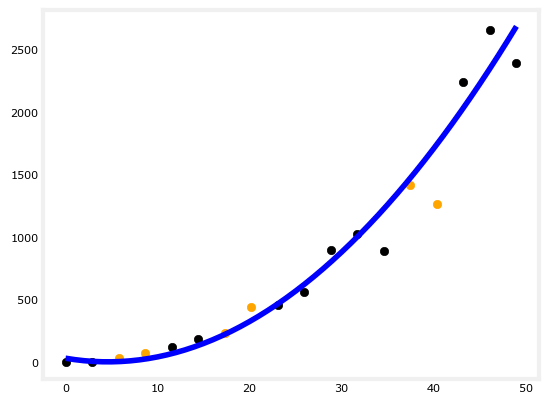

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
arr = np.arange(0,50,1)
print(arr)
pl = lr.predict(my_feature(arr))
plt.plot(arr,pl,color = "blue")
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
plt.scatter(X_train[:,0],y_train,color = "black")
plt.scatter(X_test[:,0],y_test,color = "orange")
plt.show()

In [10]:
print(err(y_test,lr.predict(X_test)))

20242.924182637762


In [11]:
print(err(y_train,lr.predict(X_train)))

14883.004420338733


In [12]:

# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)


X.shape (40,) y.shape (40,)


[ 2.51 38.95  3.77 26.38 33.92 36.44 27.64 49.   23.87 32.67 40.21 21.36
 37.69 45.23 41.46 35.18] [   5.02 1203.27   18.37  582.03 1524.49 1038.02  648.87 3217.19  601.71
  817.33 1842.58  391.09  947.63 1332.14 2055.41 1636.3 ]


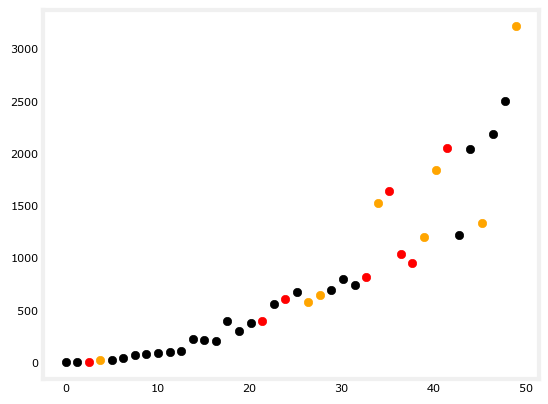

In [13]:
print(X_,y_)
plt.scatter(X_cv,y_cv,color="red")
plt.scatter(X_train,y_train,color = "black")
plt.scatter(X_test,y_test,color="orange")

In [14]:
# finding optimal degrees of freedom



In [15]:
j = []
for degree in range(1,9):
    pf = PolynomialFeatures(degree)
    std = StandardScaler()
    trans = lambda xyz:  std.fit_transform(pf.fit_transform(xyz.reshape(-1,1)))
    lr = LinearRegression()
    lr.fit(trans(X_train), y_train)

    j.append([err(y_train , lr.predict(trans(X_train))),(err(y_cv , lr.predict(trans(X_cv)))),(err(y_test , lr.predict(trans(X_test))))])
for i in range(1,8):
    print(f"degree {i} :",j[i])

degree 1 : [10284.869644500815, 116555.95479358552, 359872.7908532729]
degree 2 : [8414.672415149618, 113297.87123430961, 355250.6621486539]
degree 3 : [5572.775523064528, 108568.7861141756, 348018.8404518928]
degree 4 : [4983.975664000575, 106127.02695042326, 342279.8719676145]
degree 5 : [4735.366000049182, 112327.68400402501, 345834.3167412685]
degree 6 : [4008.19257456779, 132759.12008047898, 378292.0724225806]
degree 7 : [3820.8824561823276, 135061.81901549798, 378033.92621838383]


In [16]:
degree = 4
pf = PolynomialFeatures(degree)
std = StandardScaler()
trans = lambda xyz:  std.fit_transform(pf.fit_transform(xyz.reshape(-1,1)))
lr = LinearRegression()
lr.fit(trans(X_train), y_train)

LinearRegression()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
4


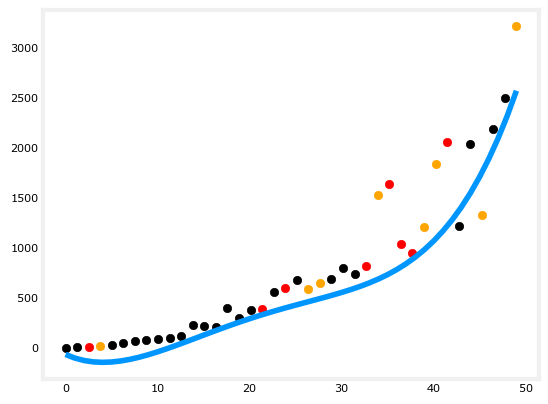

In [17]:
# X_cv_sorted = (X_cv[X_cv.argsort()])
arr = np.arange(0,50,1)
print(arr)
pl = lr.predict(trans(arr))
plt.plot(arr,pl)
plt.scatter(X_train,y_train,color = "black")
plt.scatter(X_cv,y_cv,color="red")
plt.scatter(X_test,y_test,color="orange")
print(degree)

In [18]:
degree = 4
pf = PolynomialFeatures(degree)
std = StandardScaler()
trans = lambda xyz:  std.fit_transform(pf.fit_transform(xyz.reshape(-1,1)))
lambda_ = [10**(-x) for x in range(1,13)]
j= []
for l in lambda_:
    lr = linear_model.Ridge(alpha = l)
    lr.fit(trans(X_train), y_train)
    j.append([err(y_train , lr.predict(trans(X_train))),(err(y_cv , lr.predict(trans(X_cv)))),(err(y_test , lr.predict(trans(X_test))))])

for i in range(len(lambda_)):
    print(f"for {lambda_[i]} :",j[i])

for 0.1 : [7988.2517940335065, 112737.59753861921, 354702.67168760777]
for 0.01 : [7476.349872190514, 111533.27873250675, 353065.83042681956]
for 0.001 : [6146.911142592167, 109453.7755136443, 350159.21479338035]
for 0.0001 : [5591.756992559306, 108605.05179998436, 348307.03657388117]
for 1e-05 : [5573.0006801433165, 108570.06133285046, 348048.069100313]
for 1e-06 : [5572.777815312964, 108568.88514147956, 348021.7656755013]
for 1e-07 : [5572.775546028293, 108568.7957262155, 348019.1329957193]
for 1e-08 : [5572.775523294196, 108568.78707246658, 348018.8697064833]
for 1e-09 : [5572.775523066874, 108568.78620997535, 348018.8433773474]
for 1e-10 : [5572.775523064591, 108568.78612375457, 348018.84074442426]
for 1e-11 : [5572.775523064561, 108568.78611513341, 348018.8404811481]
for 1e-12 : [5572.77552306458, 108568.78611427068, 348018.8404548039]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[[5572.777815312964, 108568.88514147956, 348021.7656755013]]


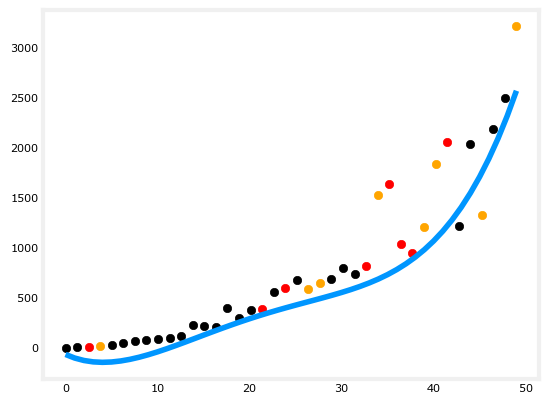

In [19]:
degree = 4
lambda_ = 1e-06
j=[]
pf = PolynomialFeatures(degree)
std = StandardScaler()
trans = lambda xyz:  std.fit_transform(pf.fit_transform(xyz.reshape(-1,1)))
lr = linear_model.Ridge(alpha = lambda_)
lr.fit(trans(X_train), y_train)
arr = np.arange(0,50,1)
print(arr)
pl = lr.predict(trans(arr))
plt.plot(arr,pl)
plt.scatter(X_train,y_train,color = "black")
plt.scatter(X_cv,y_cv,color="red")
plt.scatter(X_test,y_test,color="orange")
j.append([err(y_train , lr.predict(trans(X_train))),(err(y_cv , lr.predict(trans(X_cv)))),(err(y_test , lr.predict(trans(X_test))))])
print(j)

In [20]:

def trans(data,degree=1):
    pf = PolynomialFeatures(degree)
    std = StandardScaler()
    return std.fit_transform(pf.fit_transform(data))

In [21]:
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


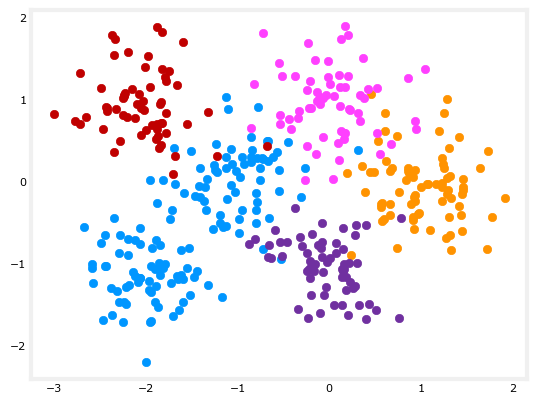

In [22]:
# color = ["black"]

res =np.unique(y_train) 
for i in res:
    plt.scatter(X_train[y_train == i][:,0],X_train[y_train ==i][:,1])

In [23]:
# j=[]
# for degree in range(0,9):
#     model = Sequential(
#     [
#         Dense(units = 10,activation = 'relu'),
#         Dense(units = 6,activation = 'linear'),
#     ],name = "my_model"
# )

#     model.compile(
#     loss = tf.keras.losses.sparsecategoricalcrossentropy(from_logits = True),
#     optimizer = tf.keras.optimizers.Adam()
#     )
#     model.fit(trans(X_train,degree), y_train)
#     j.append([err(y_train , model.predict(trans(X_train,degree))),(err(y_cv , model.predict(trans(X_cv,degree)))),(err(y_test , model.predict(trans(X_test,degree))))])

# for i in range(0,9):
#     print(f"degree {i} :",j[i])

In [24]:
def err(y,y_hat):
    ls = tf.nn.softmax(y_hat).numpy()
    f = 0
    for i in range(y.shape[0]):
        k = np.argmax(ls[i])
        f += 0 if k == y[i] else 1
    return  f

In [25]:
model = Sequential(
[
    tf.keras.Input(shape = [2,]),
    Dense(units = 120,activation = 'relu'),
    Dense(units = 40,activation = 'relu'),
    Dense(units = 6,activation = 'linear'),
],name = "my_model"
)

model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
optimizer = tf.keras.optimizers.Adam(0.01)
)
model.fit(X_train, y_train,epochs = 10)
j=([err(y_train , model.predict(X_train)),(err(y_cv , model.predict(X_cv))),(err(y_test , model.predict(X_test)))])

Epoch 1/10
13/13 [==============================] - 0s 1ms/step - loss: 1.0496
Epoch 2/10
13/13 [==============================] - 0s 750us/step - loss: 0.3989
Epoch 3/10
13/13 [==============================] - 0s 750us/step - loss: 0.3142
Epoch 4/10
13/13 [==============================] - 0s 750us/step - loss: 0.3207
Epoch 5/10
13/13 [==============================] - 0s 750us/step - loss: 0.2388
Epoch 6/10
13/13 [==============================] - 0s 750us/step - loss: 0.2489
Epoch 7/10
13/13 [==============================] - 0s 750us/step - loss: 0.2196
Epoch 8/10
13/13 [==============================] - 0s 833us/step - loss: 0.2026
Epoch 9/10
13/13 [==============================] - 0s 750us/step - loss: 0.2045
Epoch 10/10
3/3 [==============================] - 0s 1ms/step


In [26]:
j

[27, 20, 12]

1082/1082 [==============================] - 1s 491us/step


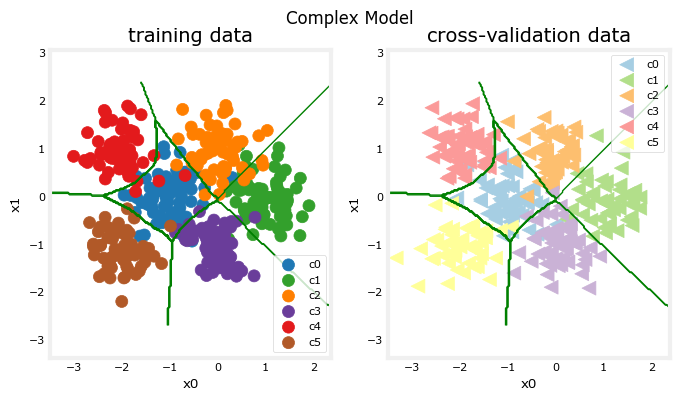

In [27]:

model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [28]:
model = Sequential(
[
    tf.keras.Input(shape = [2,]),
    Dense(units = 6,activation = 'relu'),
    Dense(units = 6,activation = 'linear'),
],name = "my_model"
)

model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
optimizer = tf.keras.optimizers.Adam(0.01)
)
model.fit(X_train, y_train,epochs = 10)
j=([err(y_train , model.predict(X_train)),(err(y_cv , model.predict(X_cv))),(err(y_test , model.predict(X_test)))])

Epoch 1/10
13/13 [==============================] - 0s 750us/step - loss: 1.5696
Epoch 2/10
13/13 [==============================] - 0s 750us/step - loss: 1.3703
Epoch 3/10
13/13 [==============================] - 0s 750us/step - loss: 1.2111
Epoch 4/10
13/13 [==============================] - 0s 667us/step - loss: 1.0630
Epoch 5/10
13/13 [==============================] - 0s 667us/step - loss: 0.9254
Epoch 6/10
13/13 [==============================] - 0s 750us/step - loss: 0.8051
Epoch 7/10
13/13 [==============================] - 0s 750us/step - loss: 0.7074
Epoch 8/10
13/13 [==============================] - 0s 667us/step - loss: 0.6235
Epoch 9/10
13/13 [==============================] - 0s 667us/step - loss: 0.5512
Epoch 10/10
3/3 [==============================] - 0s 1ms/step


In [29]:
j

[54, 34, 12]

1082/1082 [==============================] - 0s 447us/step


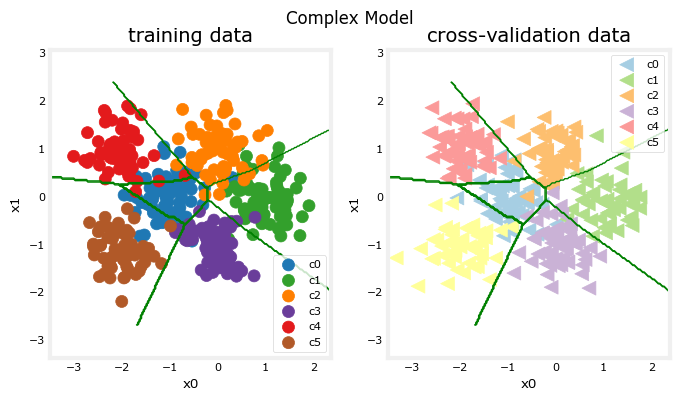

In [30]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [31]:
j

[54, 34, 12]